# Association between area-level deprivation, demographic trends and restaurant locations in London

By  
Adrian Turculet
## 1.0 Introduction
### 1.1 Background
London is the capital of England and the United Kingdom and one of the largest and most important cities in the world. It has a diverse range of people and cultures that currently make the city one of the most populate cities in the world with 9,787,426 inhabitants registered at the 2011 census.[1]
With such a large number of inhabitants, the deprivation levels and population density can vary immensely between the 32 local authorities, also known as the London boroughs. 
### 1.2 Business problem
London is not only known for its population size and diversity but also for the restaurant industry which plays an important role in the city's economy. 
For this reason, in this project I will be comparing and analysing the different deprivation levels and population demographics across London's boroughs and investigate the association between deprivation levels and restaurant locations, specifically, what types of restaurants and their prices can be found in different boroughs.
### 1.3 Interest
The findings of this research can help potential/existing restaurateurs looking to open a new restaurant or other business stakeholders, by identifying new suitable locations for their business, based on various characteristics such as:
- Restaurant price range
- Number of competing restaurants in the area
- Population size/density 
- Area-level deprivation
- Region size

## 2.0 Data
To achieve the goals set out in this project, various types of data will be explored and analysed. This includes real-time location data using the Foursquare API[2], geospatial data using Python Geocoder library[3] and GADM (Database of Global Administrative Areas) data, Indices of Deprivation data[4] and London Borough Profiles data using the online London Datastore[5].
### 2.1 Foursquare API
Foursquare is a social networking service that provides independent location data. The purpose of the platform is to provide users with information about businesses and attractions around them using real-time location data.[6]
This API will be instrumental in identifying detailed information about restaurants across London.
### 2.2 Python Geocoder library
Geocoder is a simple and consistent geocoding library written in Python. It helps developers to locate the coordinates of addreses, cities, countries and landmarks across the globe.
The Geocoder will help get the coordinates for every London borough. 
### 2.3 GADM (Database of Global Administrative Areas) data
GADM is a high-resolution database of country administrative areas, with a goal of "all countries, at all levels, at any time period. The database includes shapefiles that are used in Geographic Information System (GIS) applications. 
### 2.4 Indices of Deprivation data and London Borough Profiles data
The Index of Multiple Deprivation 2019 combines a number of indicators, chosen to cover a range of economic, social and housing issues, into a single deprivation score for each small area in England. This allows each area to be ranked relative to one another according to their level of deprivation.[4]  
Index of deprivation will be used to assign a deprivation score to each London borough.

The London Borough Profiles help paint a general picture of an area by presenting a range of headline indicator data in both spreadsheet and map form to help show statistics covering demographic, economic, social and environmental datasets for each borough, alongside relevant comparator areas. This information will be used to understand each borough’s demographic trends. 

[1] ["2011 Census – Built-up areas"](http://www.nomisweb.co.uk/articles/747.aspx) ONS. Retrieved 08 January 2020  
[2] [“Foursquare API”](https://developer.foursquare.com/)  
[3] [“Python Geocoder”](https://geocoder.readthedocs.io/)  
[4] [“Indices of Multiple Deprivation 2019, Borough”](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019)  
[5] [“London Borough Profiles data 2017”](https://data.london.gov.uk/dataset/london-borough-profiles)  
[6] [“Foursquare”](https://foursquare.com/)  

#### Shape files for the creation of the London boroughs map
https://data.gov.uk/dataset/6cdebf5d-c69b-4480-8c9c-53ab8a816b9d/statistical-gis-boundary-files-for-london

#### Converting the shapefiles into GeoJSON format for rendering in Folium 
https://mapshaper.org/

## 3.0 Exploratory data analysis

#### Import the relevant libraries 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import json
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model # for linear regression model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#### Import the London Borough Profiles data

In [5]:
# The code was removed by Watson Studio for sharing.

#### Preview the Borough_profiles data to check it has been correctly read from file

In [6]:
boroughs_profiles.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [4]:
boroughs_profiles.tail()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
33,E13000001,Inner London,NaN,3535700,1522541,"31,929",110.7,34.7,38.5,54.7,...,7.2,3.4,-,5.3,.,.,23.4,69.7,3.8,37.7
34,E13000002,Outer London,NaN,5299800,2079422,"125,424",42.3,36.9,13.8,71.7,...,7.3,3.2,-,6.5,.,.,39.2,49.4,7.8,39.6
35,E12000007,London,NaN,8835500,3601963,"157,215",56.2,36.0,13.9,73.6,...,7.2,3.3,23.2,6.0,169,.,33.1,57.3,6.3,38.9
36,E92000001,England,NaN,55609600,.,"13,025,967",.,40.0,19.0,63.3,...,7.3,3.0,19.8,6.2,183,.,.,.,.,.
37,K02000001,United Kingdom,NaN,65999100,.,.,.,40.1,18.8,63.3,...,7.3,3.0,-,NaN,.,.,.,.,.,.


#### The imported data includes other geographical levels of information which will have to be excluded

#### Clean up the dataset to remove columns and rows that will not be used for analysis

As seen above, the dataset includes additional entries beside the 33 boroughs of London. It also includes 84 columns but for this study will include only the relevant ones.
I will be keeping into account information such as Population size, Land size, Population density, Average Age and Unemployment rates.

In [30]:
population = boroughs_profiles.iloc[0:33,[0,1,3,5,6,7,31]]
population.head()

,Code,Area_name,GLA_Population_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017",Unemployment_rate_(2015)
0,E09000001,City of London,8800,290,30.3,43.2,.
1,E09000002,Barking and Dagenham,209000,"3,611",57.9,32.9,11
2,E09000003,Barnet,389600,"8,675",44.9,37.3,8.5
3,E09000004,Bexley,244300,"6,058",40.3,39.0,7.6
4,E09000005,Brent,332100,"4,323",76.8,35.6,7.5


#### Rename the columns so that they make sense.

In [31]:
population.rename(columns={'Area_name':'Borough', 'GLA_Population_Estimate_2017':'Population','Inland_Area_(Hectares)':'Region',
                           'Population_density_(per_hectare)_2017':'Population_density','Average_Age,_2017':'Age','Unemployment_rate_(2015)':'Unemployment'}, inplace=True)
population.head()

,Code,Borough,Population,Region,Population_density,Age,Unemployment
0,E09000001,City of London,8800,290,30.3,43.2,.
1,E09000002,Barking and Dagenham,209000,"3,611",57.9,32.9,11
2,E09000003,Barnet,389600,"8,675",44.9,37.3,8.5
3,E09000004,Bexley,244300,"6,058",40.3,39.0,7.6
4,E09000005,Brent,332100,"4,323",76.8,35.6,7.5


#### Remove the ',' inside Region_size values and turn it into numeric variable

In [32]:
region = []
for s in population["Region"]:
    s = s.replace(',', '')
    region.append(s)
dfreg = pd.DataFrame(region, columns=['Region_size'])
dfreg.head()

,Region_size
0,290
1,3611
2,8675
3,6058
4,4323


In [33]:
population = pd.merge(population, dfreg, left_index=True, right_index=True)
del population["Region"]
population.head()

,Code,Borough,Population,Population_density,Age,Unemployment,Region_size
0,E09000001,City of London,8800,30.3,43.2,.,290
1,E09000002,Barking and Dagenham,209000,57.9,32.9,11,3611
2,E09000003,Barnet,389600,44.9,37.3,8.5,8675
3,E09000004,Bexley,244300,40.3,39.0,7.6,6058
4,E09000005,Brent,332100,76.8,35.6,7.5,4323


We can see that the "Unemployment" value for "City of London" is "."   
This value will be predicted using a simple linear regression algorithm and data from the Deprivation index.  

In [54]:
# select the "City of London" cell in the "Unemployment" column and set it to 0
#population.iloc[[0],[5]] = 0

### Upload the official Index of Multiple Deprivation 2019 in England and Wales dataset 

In [34]:

body = client_41b4778469df43fe963b8b1f9139f7c1.get_object(Bucket='finalcapstoneproject-donotdelete-pr-uaezqxwurow9pd',Key='IMD2019_Index_of_Multiple_Deprivation.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
deprivation_2019 = pd.read_csv(body)
deprivation_2019.head()


,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Rank,Index of Multiple Deprivation (IMD) Decile
0,E01000001,City of London 001A,E09000001,City of London,"29,199",9
1,E01000002,City of London 001B,E09000001,City of London,"30,379",10
2,E01000003,City of London 001C,E09000001,City of London,"14,915",5
3,E01000005,City of London 001E,E09000001,City of London,"8,678",3
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,"14,486",5


#### Calculate the average deprivation score at borough level in order to append it to the borough profiles dataframe
#### This score will be used to predict the Unemployment rate for "City of London"

In [35]:
deprivation = deprivation_2019.groupby(['Local Authority District name (2019)'], as_index=False).mean().sort_values(by=['Index of Multiple Deprivation (IMD) Decile'], ascending=True)
deprivation = deprivation.round({'Index of Multiple Deprivation (IMD) Decile': 2})
deprivation.head(10)

,Local Authority District name (2019),Index of Multiple Deprivation (IMD) Decile
21,Blackpool,2.41
159,Manchester,2.54
145,Knowsley,2.56
8,Barking and Dagenham,2.68
112,Hackney,2.74
154,Liverpool,2.75
220,Sandwell,2.81
18,Birmingham,2.89
142,"Kingston upon Hull, City of",2.95
190,Nottingham,2.96


In [36]:
# rename the field 
deprivation.rename(columns={'Index of Multiple Deprivation (IMD) Decile':'Deprivation'}, inplace=True)

#### Join the deprivation score to the borough profiles dataframe only for London

In [37]:
df = pd.merge(population, deprivation, left_on='Borough', right_on='Local Authority District name (2019)', how='left').drop(['Local Authority District name (2019)'], axis=1)#.sort_values(by=['Deprivation'])
df.head()

,Code,Borough,Population,Population_density,Age,Unemployment,Region_size,Deprivation
0,E09000001,City of London,8800,30.3,43.2,.,290,6.67
1,E09000002,Barking and Dagenham,209000,57.9,32.9,11,3611,2.68
2,E09000003,Barnet,389600,44.9,37.3,8.5,8675,6.38
3,E09000004,Bexley,244300,40.3,39.0,7.6,6058,6.51
4,E09000005,Brent,332100,76.8,35.6,7.5,4323,4.16


In [38]:
# convert the dataframe columns to be numeric
df[["Unemployment","Population_density","Region_size","Deprivation"]] = df[["Unemployment", "Population_density","Region_size","Deprivation"]].apply(pd.to_numeric, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 8 columns):
Code                  33 non-null object
Borough               33 non-null object
Population            33 non-null int64
Population_density    33 non-null float64
Age                   33 non-null float64
Unemployment          33 non-null object
Region_size           33 non-null int64
Deprivation           33 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.3+ KB


## Simple Regression Model for predicting the "Unemployment" rate in "City of London" entry

#### Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [39]:
# split the dataset without including the row where we need to predict the Unemployment value
cdf = df.iloc[1:, [5,7]]
cdf = cdf[["Unemployment","Deprivation"]].apply(pd.to_numeric, errors='ignore')

In [40]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 2 columns):
Unemployment    32 non-null float64
Deprivation     32 non-null float64
dtypes: float64(2)
memory usage: 768.0 bytes


#### Train data distribution

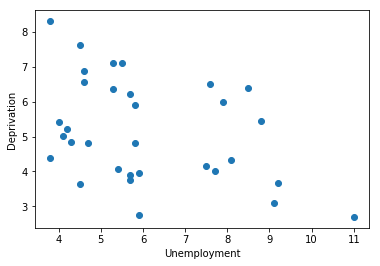

In [47]:
#cdf.sort_values(by=['Unemployment'], inplace=True)
plt.scatter(cdf.Unemployment,cdf.Deprivation)

plt.xlabel("Unemployment")
plt.ylabel("Deprivation")
plt.show()

#### Modeling
Using sklearn package to model data.

In [48]:
X = np.asanyarray(cdf[['Unemployment']])
y = np.asanyarray(cdf[['Deprivation']])
regr = LinearRegression()
regr.fit (X, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.30216311]]
Intercept:  [6.98908513]


#### Plot outputs and view the best fitting line produced by our model 

Text(0, 0.5, 'Deprivation')

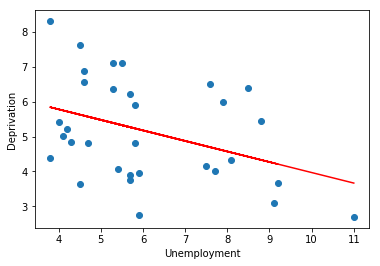

In [49]:
y_hat = regr.predict(X)
plt.scatter(cdf.Unemployment,cdf.Deprivation)
plt.plot(X, y_hat, '-r')
plt.xlabel("Unemployment")
plt.ylabel("Deprivation")

#### Evaluate the linear regression model using R²

In [50]:
print("R2-score: %.2f" % r2_score(y, y_hat))

R2-score: 0.15


#### Now predict the Unemployment rates for City of London using the prediction model above

In [51]:
y_hat = regr.predict(df[['Deprivation']])
# take the first value since we know that the first row is "City of London"
y_hat[0]

array([4.97365721])

In [53]:
##### set the Unemployment value to the predicted value above
df.iloc[[0],[5]] = y_hat[0]

In [55]:
df.sort_index(inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')
df['Unemployment'] = df['Unemployment'].round(1)
df.head()

,Code,Borough,Population,Population_density,Age,Unemployment,Region_size,Deprivation
0,E09000001,City of London,8800,30.3,43.2,5.0,290,6.67
1,E09000002,Barking and Dagenham,209000,57.9,32.9,11.0,3611,2.68
2,E09000003,Barnet,389600,44.9,37.3,8.5,8675,6.38
3,E09000004,Bexley,244300,40.3,39.0,7.6,6058,6.51
4,E09000005,Brent,332100,76.8,35.6,7.5,4323,4.16


#### Analyse data distribution using histograms

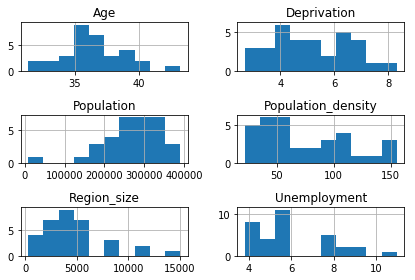

In [56]:
viz = df[['Population','Population_density','Age', 'Unemployment', 'Deprivation','Region_size']]
viz.hist()
plt.tight_layout()
plt.show()

In [57]:
population_dep = df.sort_values(by=['Deprivation'])
population_dep.set_index(['Borough'], inplace=True)

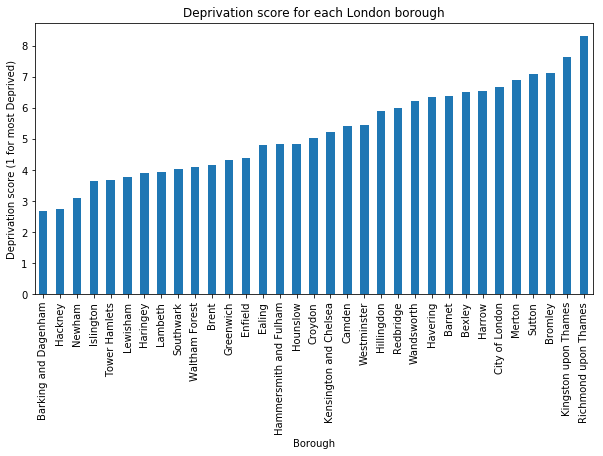

In [58]:
deprivation_graph = population_dep['Deprivation'].transpose()

deprivation_graph.plot(kind='bar', 
             stacked=False,
             figsize=(10, 5), # pass a tuple (x, y) size
             )

plt.title('Deprivation score for each London borough')
plt.ylabel('Deprivation score (1 for most Deprived)')
plt.xlabel('Borough')

plt.show()

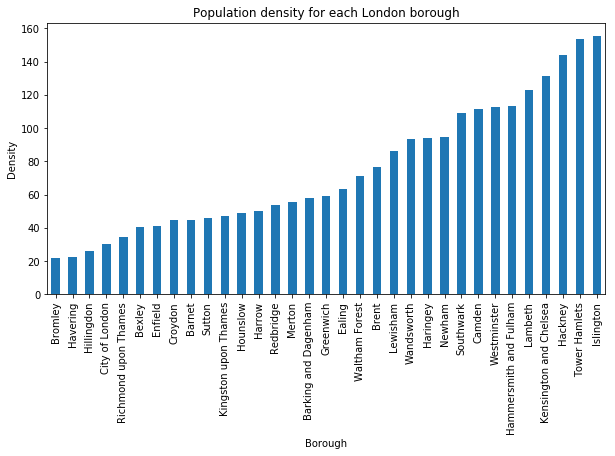

In [60]:
population_density = df.sort_values(by =['Population_density'], ascending=True)
population_density.set_index(['Borough'], inplace=True)
population_density = population_density['Population_density'].transpose()

population_density.plot(kind='bar', 
             stacked=False,
             figsize=(10, 5), # pass a tuple (x, y) size
             )

plt.title('Population density for each London borough')
plt.ylabel('Density')
plt.xlabel('Borough')

plt.show()

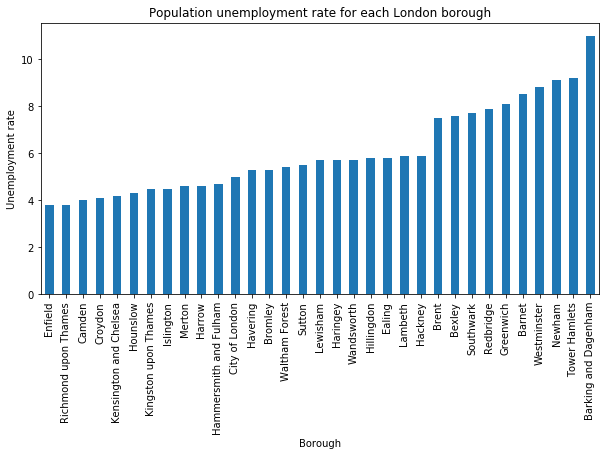

In [61]:
population_Unemployment = df.sort_values(by =['Unemployment'], ascending=True)
population_Unemployment.set_index(['Borough'], inplace=True)
population_Unemployment = population_Unemployment['Unemployment'].transpose()

population_Unemployment.plot(kind='bar', 
             stacked=False,
             figsize=(10, 5), # pass a tuple (x, y) size
             )

plt.title('Population unemployment rate for each London borough')
plt.ylabel('Unemployment rate')
plt.xlabel('Borough')

plt.show()

In [62]:
df = df.sort_values(by=['Deprivation']).reset_index(drop=True)
df.head()

,Code,Borough,Population,Population_density,Age,Unemployment,Region_size,Deprivation
0,E09000002,Barking and Dagenham,209000,57.9,32.9,11.0,3611,2.68
1,E09000012,Hackney,274300,144.0,33.1,5.9,1905,2.74
2,E09000025,Newham,342900,94.7,32.1,9.1,3620,3.09
3,E09000019,Islington,231200,155.6,34.8,4.5,1486,3.64
4,E09000030,Tower Hamlets,304000,153.7,31.4,9.2,1978,3.68


## Fetching geospatial information for each London borough

In [79]:
! pip install geocoder

     |████████████████████████████████| 102kB 12.7MB/s ta 0:00:01


In [80]:
import geocoder
# test the geocoder database
g = geocoder.osm('London')
g.latlng

[51.5073219, -0.1276474]

### Using the borough names, loop through the Geocoder database and fetch each borough's coordinates

In [81]:
# in order to select the correct boroughs, the following string needs to be added to the values in the 'Borough' column
lst = []
for b in df['Borough']:
    lst.append('London Borough of ' + b)
df1 = pd.DataFrame(lst, columns=['Borough'])
df1.head()

,Borough
0,London Borough of Barking and Dagenham
1,London Borough of Hackney
2,London Borough of Newham
3,London Borough of Islington
4,London Borough of Tower Hamlets


In [82]:
# download coordinates from the geocoder database
latlng = []
for n in df1['Borough']:
    g = geocoder.osm(n)
    latlng.append(g.latlng)
df2 = pd.DataFrame(latlng, columns=['Lat','Long'])
print('Coordinates downloaded successfuly!')

Coordinates downloaded successfuly!


In [83]:
# join the new coordinates table to the existing boroughs table
df = pd.merge(df, df2, left_index=True, right_index=True)
df.head()

,Cluster Labels,Borough,Population,Population_density,Age,Unemployment,Region_size,Deprivation,£,££,£££,££££,Lat,Long
0,0,Barking and Dagenham,209000,57.9,32.9,11.0,3611,2.68,5,9,0,0,51.554117,0.150504
1,0,Hackney,274300,144.0,33.1,5.9,1905,2.74,2,9,0,0,51.549049,-0.047801
2,0,Newham,342900,94.7,32.1,9.1,3620,3.09,2,12,0,1,51.530000,0.029318
3,0,Islington,231200,155.6,34.8,4.5,1486,3.64,2,17,2,0,51.547156,-0.101694
4,0,Tower Hamlets,304000,153.7,31.4,9.2,1978,3.68,2,12,2,1,51.514562,-0.035012


In [2]:
!conda install -c conda-forge folium=0.5.0 --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

### Establish connection to FourSquare API

In [81]:
# The code was removed by Watson Studio for sharing.

In [82]:
# use coordinates for the first borough in the dataset for testing purposes
d_latitude = df.loc[0, 'Lat']
d_longitude = df.loc[0, 'Long']

In [83]:
# Access the API using credentials above
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, d_latitude, d_longitude, VERSION, radius, LIMIT)

In [84]:
#save json data in a python list
results = requests.get(url).json()

#### Create a function to extract the category of each venue

In [85]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Filter only the fields of interest (i.e. venue name, category, latitude, longitude) into a separate dataframe

In [86]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.groupby('categories').count().sort_values(by=['name'], ascending=False)

,id,name,lat,lng
categories,,,,
Coffee Shop,6,6,6,6
Sandwich Place,4,4,4,4
Italian Restaurant,4,4,4,4
Wine Bar,3,3,3,3
Vietnamese Restaurant,3,3,3,3
Sushi Restaurant,2,2,2,2
Seafood Restaurant,2,2,2,2
French Restaurant,2,2,2,2
Restaurant,2,2,2,2


#### Select only venues that are restaurants

In [87]:
restaurants = nearby_venues[nearby_venues['categories'].str.contains("Restaurant")].reset_index(drop=True)
restaurants#.groupby('categories').count().sort_values(by=['name'], ascending=False)

,id,name,categories,lat,lng
0,4cadc734632b370400f7696e,City Càphê,Vietnamese Restaurant,51.514750,-0.091545
1,50ed6e85e4b0ffbaac00836c,Burger & Lobster,Seafood Restaurant,51.513687,-0.094643
2,4bf6c59413aed13a6d2aeaf7,Manicomio,Italian Restaurant,51.515369,-0.095414
3,55645a51498eb6f3a5ae4df7,The Trading House,Modern European Restaurant,51.515063,-0.091427
4,4ac518d5f964a5200fa820e3,Coq d'Argent,French Restaurant,51.513303,-0.091036
5,524b249e498e0f789ef79509,Wahaca,Mexican Restaurant,51.514034,-0.095556
6,5b0986c00a08ab002c2e44e0,Brigadiers,Indian Restaurant,51.512721,-0.091922
7,590cea61a423623a3ef5e26a,Malibu Kitchen,New American Restaurant,51.513511,-0.090074
8,54cb7bae498e99dacf3c3a28,Banh Mi Bay,Vietnamese Restaurant,51.512621,-0.094847
9,4e1ed9ddae60cd553deae5cd,Bread Street Kitchen,English Restaurant,51.513309,-0.094916


#### Testing connection for one restaurant to investigate the json structure and identify the price tier

In [ ]:
url1 = 'https://api.foursquare.com/v2/venues/55aaa13f498e486cd80d4ac2/?client_id={}&client_secret={}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT)
results1 = requests.get(url1).json()

#### Get prices for the borough accessed above

In [72]:
prices = []
for ids in restaurants['id']:
    url1 = 'https://api.foursquare.com/v2/venues/' + ids + '/?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, d_latitude, d_longitude, VERSION, radius, LIMIT)
    results1 = requests.get(url1).json()
    print(results1['response']['venue']['name'])
    try:
        nearby = results1['response']['venue']['price']['tier']
        prices.append(nearby)
        pricedf = pd.DataFrame(prices, columns=['Tier'])
    
    except:
        prices.append(0)


Nando's
The Greyhound (Harvester)
Ciao Bella
The Pipe Major
Burger King
Braza
TGI Fridays
Frankie & Benny's
McDonald's
Burger King
Zizzi
McDonald's
Moby Dick
Toby Carvery
New China Gold
Cosmo
KFC


#### Let's create a function to repeat the same process for all the boroughs in London

In [56]:
def getNearbyVenues(names, latitudes, longitudes,radiuses):
    
    venues_list=[]
    for name, lat, lng, radius in zip(names, latitudes, longitudes, radiuses):
        print(name, radius)
             
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue id']
    
    return(nearby_venues)

#### Now write the code to run the above function on each borough and create a new dataframe called london_venues.

In [57]:
london_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Lat'],
                                   longitudes=df['Long'],
                                   radiuses=df['Region_size']
                                  )

Barking and Dagenham 3611
Hackney 1905
Newham 3620
Islington 1486
Tower Hamlets 1978
Lewisham 3515
Haringey 2960
Lambeth 2681
Southwark 2886
Waltham Forest 3881
Brent 4323
Greenwich 4733
Enfield 8083
Ealing 5554
Hammersmith and Fulham 1640
Hounslow 5598
Croydon 8650
Kensington and Chelsea 1212
Camden 2179
Westminster 2149
Hillingdon 11570
Redbridge 5642
Wandsworth 3426
Havering 11235
Barnet 8675
Bexley 6058
Harrow 5046
City of London 290
Merton 3762
Sutton 4385
Bromley 15013
Kingston upon Thames 3726
Richmond upon Thames 5741


In [58]:
# check the dataframe shape and size
print(london_venues.shape)
london_venues.head()

(3269, 8)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Barking and Dagenham,51.554117,0.150504,Central Park,51.559560,0.161981,Park,4ac518f8f964a520d6af20e3
1,Barking and Dagenham,51.554117,0.150504,The Eva Hart (Wetherspoon),51.570460,0.130342,Pub,4c87aa9e821e9eb097cc8d89
2,Barking and Dagenham,51.554117,0.150504,Harrow Lodge Park,51.555648,0.197926,Park,4bbb1de098c7ef3b0cbb3302
3,Barking and Dagenham,51.554117,0.150504,Capital Karts,51.531792,0.118739,Go Kart Track,52a3108a11d2a4fe768fdfef
4,Barking and Dagenham,51.554117,0.150504,Hylands Park,51.572074,0.191155,Park,4c821655e602b1f742f1987a


In [59]:
# choose only venues that are restaurants
restaurants1 = london_venues[london_venues['Venue Category'].str.contains("Restaurant")].reset_index(drop=True)
restaurants1.shape
restaurants1.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
Borough,,,,,,,
Barking and Dagenham,16,16,16,16,16,16,16
Barnet,26,26,26,26,26,26,26
Bexley,10,10,10,10,10,10,10
Brent,27,27,27,27,27,27,27
Bromley,13,13,13,13,13,13,13
Camden,19,19,19,19,19,19,19
City of London,26,26,26,26,26,26,26
Croydon,19,19,19,19,19,19,19
Ealing,14,14,14,14,14,14,14


In [121]:
prices = []
for ids in restaurants1['Venue id']:
    url1 = 'https://api.foursquare.com/v2/venues/' + ids + '/?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, d_latitude, d_longitude, VERSION, radius, LIMIT)
    results1 = requests.get(url1).json()    
    try:
        nearby = results1['response']['venue']['price']['tier']
        print(results1['response']['venue']['name'])
        prices.append(nearby)            
    except:
        prices.append(0)
pricedf = pd.DataFrame(prices, columns=['Tier'])

Nando's
Ciao Bella
The Pipe Major
Burger King
Braza
TGI Fridays
Frankie & Benny's
McDonald's
Burger King
Zizzi
McDonald's
Moby Dick
Cosmo
KFC
Black Cat
Uchi
My Neighbours The Dumplings
krapow!
Dom's Place
Green Papaya
LARDO
Scoffs Grill
Mao Chow
Bright
Cookdaily
McDonald's
Vijay's Chawalla
Zero Sette
Saravanaa Bhavan
Meydan Sofrasi
Arch Rivals
Olive and Lemon
Tapa Tapa
Ananthapuram (Traditional Kerala Restaurant)
Yi-Ban
Nando's
Gaucho
Santi
Wahaca
Nakhon Thai Restaurant
Prawn On The Lawn Islington
Black Axe Mangal
Trullo
Le Péché Mignon
Westerns Laundry
Ottolenghi
Zaffrani's
SSÄM - Korean Dining
OA Comtam
Xi'an Impression
Farang
Akari
Primeur
Saponara
Zen Mondo
Sariyer Balik
Afghan Kitchen
Sushi Show
Sambal Shiok
Beyti
Au Lac
Kirvem
Verdi's
Ariana Iranian Restaurant
Ibérica
Sticks'n'Sushi
ShanShuiJian 山水間
La Figa
Efes
Ippudo
Roka
Chai Ki
Noodle Street
Palmers Restaurant
Gaucho
Neama
Boisdale of Canary Wharf
Wahaca
Levante Pide Restaurant
Côte Brasserie
Babur
Buenos Aires Cafe
Levante r

#### The API has a limit of 500 hits per day and this process needs to be repeated for the remaining venues that didn't get a price tier

In [122]:
restaurants1 = pd.merge(restaurants1, pricedf, left_index=True, right_index=True)
restaurants1

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,Tier
0,Barking and Dagenham,51.554117,0.150504,Nando's,51.567729,0.116807,Portuguese Restaurant,5d72e633b40a620008bf3518,2
1,Barking and Dagenham,51.554117,0.150504,Ciao Bella,51.576103,0.182819,Italian Restaurant,4bf70cfdc07c9c74b690bbef,2
2,Barking and Dagenham,51.554117,0.150504,The Greyhound (Harvester),51.568429,0.119456,English Restaurant,4dea493c18386283a3e063f6,0
3,Barking and Dagenham,51.554117,0.150504,The Pipe Major,51.545800,0.165860,Restaurant,4e7a1f5414954a343fb58258,2
4,Barking and Dagenham,51.554117,0.150504,Burger King,51.565342,0.193468,Fast Food Restaurant,4adcbef1f964a5205a2f21e3,1


In [123]:
restaurants1.shape

(664, 9)

#### Export the above dataframe to csv file so I don't have to scrape the restaurant data again using the Foursquare API (can incure costs)

In [3]:
! pip install pyspark

     |████████████████████████████████| 217.8MB 71.4MB/s eta 0:00:01
     |████████████████████████████████| 204kB 58.7MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [65]:
#from pyspark import SparkContext

In [121]:
# The code was removed by Watson Studio for sharing.

In [126]:
project.save_data(file_name = "london_restaurant_prices.csv",data = restaurants1.to_csv(index=False))

{'file_name': 'london_restaurant_prices.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'finalcapstoneproject-donotdelete-pr-uaezqxwurow9pd',
 'asset_id': 'ff86e2e8-2916-457f-8e47-a12bcb5f48b8'}

#### Access the csv file saved above, to complete the price Tier for all boroughs (!!! if the notebook has been run already, the 'london_restaurant_prices.csv' is now already complete !!!)

In [113]:
body = client_41b4778469df43fe963b8b1f9139f7c1.get_object(Bucket='finalcapstoneproject-donotdelete-pr-uaezqxwurow9pd',Key='london_restaurant_prices.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

rest_price = pd.read_csv(body)
# create a new index and use the new 'index' field as a common variable to add new prices back to this dataframe
rest_price.reset_index(inplace= True)
rest_price.head()

,index,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,Tier
0,0,Barking and Dagenham,51.554117,0.150504,Nando's,51.567729,0.116808,Portuguese Restaurant,5d72e633b40a620008bf3518,2
1,1,Barking and Dagenham,51.554117,0.150504,Ciao Bella,51.576103,0.182819,Italian Restaurant,4bf70cfdc07c9c74b690bbef,2
2,2,Barking and Dagenham,51.554117,0.150504,The Greyhound (Harvester),51.568429,0.119456,English Restaurant,4dea493c18386283a3e063f6,0
3,3,Barking and Dagenham,51.554117,0.150504,The Pipe Major,51.545800,0.165860,Restaurant,4e7a1f5414954a343fb58258,2
4,4,Barking and Dagenham,51.554117,0.150504,Burger King,51.565342,0.193468,Fast Food Restaurant,4adcbef1f964a5205a2f21e3,1


#### The boroughs selected below have incomplete Tier values. These values will be fetched from the Foursquare API once the limit is reset 

In [115]:
no_price = rest_price.loc[rest_price['Borough'].isin(['Bexley','Harrow','City of London', 'Merton', 'Sutton', 'Bromley', 'Kingston upon Thames', 'Richmond upon Thames'])]
no_price.reset_index(inplace= True)
no_price.head()

,level_0,index,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,Tier
0,492,492,Bexley,51.461969,0.145699,Carved,51.456952,0.143107,American Restaurant,552bb0e9498ea8a3d78efc05,2
1,493,493,Bexley,51.461969,0.145699,Toby Carvery,51.459222,0.126443,English Restaurant,4b2fe0c9f964a520cff124e3,0
2,494,494,Bexley,51.461969,0.145699,Assos Restaurant,51.451141,0.179190,Mediterranean Restaurant,4e2878c48877f9158a75757a,2
3,495,495,Bexley,51.461969,0.145699,Ferraris,51.441699,0.146755,Italian Restaurant,4b9aa675f964a520bdc935e3,1
4,496,496,Bexley,51.461969,0.145699,Da Peppino,51.463576,0.100365,Italian Restaurant,4da5e876f7b16ce044ae1a8d,2


In [67]:
# due to 500 hits/day limitation from FourSquare API, we need to get prices for the rest of the restaurants 
prices = []
for ids in no_price['Venue id']:
    url1 = 'https://api.foursquare.com/v2/venues/' + ids + '/?client_id={}&client_secret={}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT)
    results1 = requests.get(url1).json()
    print(results1['response']['venue']['name'])
    try:
        nearby = results1['response']['venue']['price']['tier']
        prices.append(nearby)
        price_df = pd.DataFrame(prices, columns=['New_Tier'])
    
    except:
        prices.append(0)

Carved
Toby Carvery
Assos Restaurant
Ferraris
Da Peppino
Zizzi
Old Bexley Greek Taverna
KFC
McDonald's
Prezzo
Shree Krishna Vada Pav (SKVP)
Noodle City
Ideal Fish Bar
Nando's
Everest Lounge
Kenton Kebab House
Kebab Land
Blue Ginger Bar & Restaurant
The Regency Club
Nando's
The Bombay Central
Saravanna Bhavan
Carluccio's
Il Mascalzone
Sahara Lounge
Izgara
Babylon Palace
Nando's
Cannon's Tandoori
Nando's
Sushimania
Sahibs
Prezzo
Ruby M's
Curry Mahal
Taste Of Lahore
Karahi King
only parathas
Hundred Degrees UK Ltd
Paragon
Zan Zi Bar
Purple Flame
Chikayan Chinese Restaurant
Taste of lahore
Prezzo
Venue 5
City Càphê
Burger & Lobster
Manicomio
The Trading House
Coq d'Argent
Wahaca
Brigadiers
Malibu Kitchen
Sweetings
Bread Street Kitchen
Cecconi's
Banh Mi Bay
Ekte Nordic Kitchen
Leon
K10
Kaia
itsu
Enoteca De Luca
Ping Pong
Kurumaya
Cabotte
Nando's
Haz Restaurant & Cafe
Simple Health Kitchen
Hop Vietnamese
Rucoletta
Latitude
Takahashi
Rock Star Sushi
Maki Yaki
Gourmet Kebab House
Little Vietna

In [116]:
no_price = pd.merge(no_price, price_df, left_index=True, right_index=True)

,level_0,index,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,Tier,New_Tier
167,659,659,Richmond upon Thames,51.440354,-0.308151,Obon - Sushi & Udon,51.414094,-0.300720,Japanese Restaurant,5596d48a498eb21cdc32aa9e,0,2
168,660,660,Richmond upon Thames,51.440354,-0.308151,Cappadocia Restaurant,51.412237,-0.301175,Turkish Restaurant,4ad5e270f964a520da0321e3,0,2
169,661,661,Richmond upon Thames,51.440354,-0.308151,Bill's Restaurant,51.458091,-0.305734,English Restaurant,5054d027e4b0c210747e8416,0,2
170,662,662,Richmond upon Thames,51.440354,-0.308151,Kokoro,51.411090,-0.301864,Sushi Restaurant,4c99e5f1eaa5a143b231c7e4,0,2
171,663,663,Richmond upon Thames,51.440354,-0.308151,Hanana,51.463958,-0.300759,Sushi Restaurant,5672b15c498e4d44f77d4001,0,2


In [117]:
# append new results to main restaurants dataframe
rest_price.loc[rest_price['index'].isin(no_price['index']), ['Tier']] = no_price.loc[no_price['index'].isin(rest_price['index']),['New_Tier']].values

In [119]:
del rest_price['index']
rest_price

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,Tier
0,Barking and Dagenham,51.554117,0.150504,Nando's,51.567729,0.116808,Portuguese Restaurant,5d72e633b40a620008bf3518,2
1,Barking and Dagenham,51.554117,0.150504,Ciao Bella,51.576103,0.182819,Italian Restaurant,4bf70cfdc07c9c74b690bbef,2
2,Barking and Dagenham,51.554117,0.150504,The Greyhound (Harvester),51.568429,0.119456,English Restaurant,4dea493c18386283a3e063f6,0
3,Barking and Dagenham,51.554117,0.150504,The Pipe Major,51.545800,0.165860,Restaurant,4e7a1f5414954a343fb58258,2
4,Barking and Dagenham,51.554117,0.150504,Burger King,51.565342,0.193468,Fast Food Restaurant,4adcbef1f964a5205a2f21e3,1
5,Barking and Dagenham,51.554117,0.150504,Braza,51.576344,0.181760,Brazilian Restaurant,4ed2364930f81894b07a10da,2
6,Barking and Dagenham,51.554117,0.150504,TGI Fridays,51.576780,0.179950,American Restaurant,5b7da18c112c6c002c34dfce,2
7,Barking and Dagenham,51.554117,0.150504,Frankie & Benny's,51.575003,0.180158,American Restaurant,4ba61b83f964a5200e3439e3,2
8,Barking and Dagenham,51.554117,0.150504,McDonald's,51.529466,0.155375,Fast Food Restaurant,4c2b3bc82219c9281e35a448,1
9,Barking and Dagenham,51.554117,0.150504,Burger King,51.577084,0.181380,Fast Food Restaurant,4c683790607ad13a14f6a72b,1


In [122]:
project.save_data(file_name = "london_restaurant_prices.csv",data = rest_price.to_csv(index=False), overwrite=True)

{'file_name': 'london_restaurant_prices.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'finalcapstoneproject-donotdelete-pr-uaezqxwurow9pd',
 'asset_id': 'ff86e2e8-2916-457f-8e47-a12bcb5f48b8'}

#### Insert the complete restaurant prices dataset 

In [7]:

body = client_41b4778469df43fe963b8b1f9139f7c1.get_object(Bucket='finalcapstoneproject-donotdelete-pr-uaezqxwurow9pd',Key='london_restaurant_prices.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

rest_price = pd.read_csv(body)
rest_price.head()


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,Tier
0,Barking and Dagenham,51.554117,0.150504,Nando's,51.567729,0.116807,Portuguese Restaurant,5d72e633b40a620008bf3518,2
1,Barking and Dagenham,51.554117,0.150504,Ciao Bella,51.576103,0.182819,Italian Restaurant,4bf70cfdc07c9c74b690bbef,2
2,Barking and Dagenham,51.554117,0.150504,The Greyhound (Harvester),51.568429,0.119456,English Restaurant,4dea493c18386283a3e063f6,0
3,Barking and Dagenham,51.554117,0.150504,The Pipe Major,51.545800,0.165860,Restaurant,4e7a1f5414954a343fb58258,2
4,Barking and Dagenham,51.554117,0.150504,Burger King,51.565342,0.193468,Fast Food Restaurant,4adcbef1f964a5205a2f21e3,1


#### Visualise all the restaurants on the map

In [9]:
import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

In [16]:
london_map = folium.Map(location=[51.5073219, -0.12676474], zoom_start=11)

# add markers to map
for lat, lng, venue, tier, borough in zip(rest_price['Venue Latitude'], rest_price['Venue Longitude'], rest_price['Venue'], rest_price['Tier'], rest_price['Borough']):
    label = '{},{},{}'.format(venue, tier, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(london_map)
    
london_map

To better understand how the restaurants are distributed across London and how the restaurant pricing differs, let's create a heatmap showing the density in each borough. 

In [26]:
london_map = folium.Map(location=[51.5073219, -0.12676474], zoom_start=11)
HeatMap(data=rest_price[['Venue Latitude', 'Venue Longitude', 'Tier']].groupby(['Venue Latitude', 'Venue Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(london_map)
london_map

## Analyze and Cluster Boroughs in London

Using the one-hot encoding process, assign binary values for the "Venues" categorical values in each borough.
This will be used later on when applying ML algorithms 

In [17]:
# one hot encoding
london_onehot = pd.get_dummies(rest_price[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = rest_price['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,...,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Calculate the average frequency for each restaurant type in each borough

In [18]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,...,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant
0,Barking and Dagenham,0.000000,0.000000,0.125000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Barnet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.076923,...,0.000000,0.000000,0.000000,0.115385,0.038462,0.000000,0.192308,0.000000,0.038462,0.000000
2,Bexley,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Brent,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.074074,...,0.000000,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bromley,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000
5,Camden,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.157895,0.000000,0.000000
6,City of London,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.038462,0.000000,0.115385,0.000000
7,Croydon,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.105263,0.000000,0.052632,0.000000
8,Ealing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,...,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000
9,Enfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388889,0.000000,0.000000,0.000000


#### Let's print each borough along with the top 5 most common restaurant types

In [25]:
num_top_venues = 1

for hood in london_grouped['Borough']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0  Fast Food Restaurant  0.31


----Barnet----
                venue  freq
0  Turkish Restaurant  0.19


----Bexley----
                venue  freq
0  Italian Restaurant   0.4


----Brent----
               venue  freq
0  Indian Restaurant  0.33


----Bromley----
               venue  freq
0  French Restaurant  0.15


----Camden----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.16


----City of London----
                venue  freq
0  Italian Restaurant  0.15


----Croydon----
                venue  freq
0  Turkish Restaurant  0.11


----Ealing----
                       venue  freq
0  Middle Eastern Restaurant  0.21


----Enfield----
                venue  freq
0  Turkish Restaurant  0.39


----Greenwich----
                venue  freq
0  Italian Restaurant  0.14


----Hackney----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.23


----Hammersmith and Fulham----
       

#### One hot encoding technique to convert categorical varables to binary variables
#### Count the number of restaurants in each Price tier (1:Cheap to 4:Very expensive). Category 0 means restaurant doesn't have a price tier

In [27]:
# one hot encoding
price_onehot = pd.get_dummies(rest_price['Tier'])

# add neighborhood column back to dataframe
price_onehot['Borough'] = rest_price['Borough'] 

# move neighborhood column to the first column
fixed_columns = [price_onehot.columns[-1]] + list(price_onehot.columns[:-1])
price_onehot = price_onehot[fixed_columns]

price_onehot.head()

,Borough,0,1,2,3,4
0,Barking and Dagenham,0,0,1,0,0
1,Barking and Dagenham,0,0,1,0,0
2,Barking and Dagenham,1,0,0,0,0
3,Barking and Dagenham,0,0,1,0,0
4,Barking and Dagenham,0,1,0,0,0


In [28]:
price_grouped = price_onehot.groupby('Borough').sum().reset_index()
price_grouped

,Borough,0,1,2,3,4
0,Barking and Dagenham,2,5,9,0,0
1,Barnet,1,3,21,1,0
2,Bexley,1,3,6,0,0
3,Brent,1,4,21,1,0
4,Bromley,0,2,7,3,1
5,Camden,0,3,12,4,0
6,City of London,1,1,19,5,0
7,Croydon,0,4,12,2,1
8,Ealing,2,2,10,0,0
9,Enfield,0,0,18,0,0


In [63]:
# join the restaurant price counts for each borough  
df = pd.merge(df, price_grouped, on='Borough', how='left')#.sort_values(by=['Deprivation'])
# rename the price tier columns 
df.rename(columns={0:'No price', 1:'£',2:'££',3:'£££',4:'££££'}, inplace=True)
df.head()

,Code,Borough,Population,Population_density,Age,Unemployment,Region_size,Deprivation,No price,£,££,£££,££££
0,E09000002,Barking and Dagenham,209000,57.9,32.9,11.0,3611,2.68,2,5,9,0,0
1,E09000012,Hackney,274300,144.0,33.1,5.9,1905,2.74,2,2,9,0,0
2,E09000025,Newham,342900,94.7,32.1,9.1,3620,3.09,3,2,12,0,1
3,E09000019,Islington,231200,155.6,34.8,4.5,1486,3.64,3,2,17,2,0
4,E09000030,Tower Hamlets,304000,153.7,31.4,9.2,1978,3.68,3,2,12,2,1


In [64]:
df['No price'].describe()

count    33.000000
mean      1.060606
std       0.933387
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: No price, dtype: float64

In [65]:
#we can remove the No price column and other insignificant columns to the study
del df['No price']
del df['Code']
df.head()

,Borough,Population,Population_density,Age,Unemployment,Region_size,Deprivation,£,££,£££,££££
0,Barking and Dagenham,209000,57.9,32.9,11.0,3611,2.68,5,9,0,0
1,Hackney,274300,144.0,33.1,5.9,1905,2.74,2,9,0,0
2,Newham,342900,94.7,32.1,9.1,3620,3.09,2,12,0,1
3,Islington,231200,155.6,34.8,4.5,1486,3.64,2,17,2,0
4,Tower Hamlets,304000,153.7,31.4,9.2,1978,3.68,2,12,2,1


## Unsupervised ML algorythm - Clustering ( KMeans)

Now that we have detailed information about each borough, including restaurant counts and prices, we will apply the Kmeans Clustering algorythm to create distinct zones of interest 

#### Import scikit-learn library for Machine Learning algorythms (e.g. clustering)

In [66]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [67]:
clustering_df = df[['Population', 'Population_density', 'Age', 'Unemployment', 'Region_size', 'Deprivation', '£', '££', '£££', '££££']].copy()
clustering_df.columns

Index(['Population', 'Population_density', 'Age', 'Unemployment',
       'Region_size', 'Deprivation', '£', '££', '£££', '££££'],
      dtype='object')

#### Normalizing over the standard deviation
Now let's normalize the dataset. We use StandardScaler() to normalize our dataset.

In [68]:
from sklearn.preprocessing import StandardScaler
X = clustering_df
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.79129066, -0.42732776, -1.41875497,  2.70046963, -0.35798198,
        -1.74235758,  1.38874455, -1.0340845 , -1.05447127, -0.49051147],
       [ 0.0883793 ,  1.79235481, -1.33711781, -0.07927984, -0.88764477,
        -1.70084792, -0.26770979, -1.0340845 , -1.05447127, -0.49051147],
       [ 1.01250424,  0.52138674, -1.74530363,  1.66487669, -0.35518774,
        -1.45870822, -0.26770979, -0.48070955, -1.05447127,  1.53284835],
       [-0.49222981,  2.09140611, -0.6432019 , -0.84234832, -1.01773194,
        -1.07820299, -0.26770979,  0.44158203,  0.16649546, -0.49051147],
       [ 0.4884742 ,  2.04242357, -2.03103371,  1.71938158, -0.86498042,
        -1.05052988, -0.26770979, -0.48070955,  0.16649546,  1.53284835],
       [ 0.48039148,  0.30483234, -0.56156474, -0.18828963, -0.38778715,
        -0.99518366, -0.81986124, -0.48070955,  0.16649546, -0.49051147],
       [ 0.13822277,  0.50076251, -0.52074616, -0.18828963, -0.56009832,
        -0.89832779,  0.28444165,  1.91724856

#### Find the optimum number of clusters (K)

In [69]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Clus_dataSet)
    Sum_of_squared_distances.append(km.inertia_)

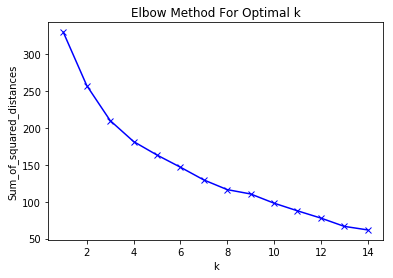

In [70]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### It looks like the optimal k is 4

In [71]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clus_dataSet)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:33] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 2, 3, 0, 1, 1,
       0, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1], dtype=int32)

In [72]:
# add clustering labels
df.insert(0, 'Cluster Labels', kmeans.labels_)

df.head() # check the last columns!

,Cluster Labels,Borough,Population,Population_density,Age,Unemployment,Region_size,Deprivation,£,££,£££,££££
0,0,Barking and Dagenham,209000,57.9,32.9,11.0,3611,2.68,5,9,0,0
1,0,Hackney,274300,144.0,33.1,5.9,1905,2.74,2,9,0,0
2,0,Newham,342900,94.7,32.1,9.1,3620,3.09,2,12,0,1
3,0,Islington,231200,155.6,34.8,4.5,1486,3.64,2,17,2,0
4,0,Tower Hamlets,304000,153.7,31.4,9.2,1978,3.68,2,12,2,1


### Visualise the clusters 

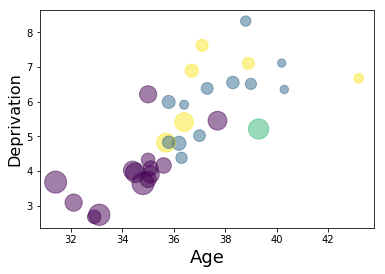

In [73]:
labels = kmeans.labels_
area = np.pi * ( X[:, 1])  
plt.scatter(X[:, 2], X[:, 5], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Deprivation', fontsize=16)

plt.show()


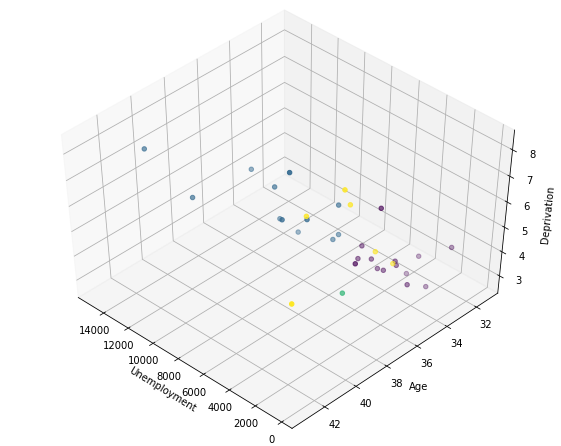

In [74]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Unemployment')
ax.set_ylabel('Age')
ax.set_zlabel('Deprivation')

ax.scatter(X[:, 4], X[:, 2], X[:, 5], c= labels.astype(np.float))

## Create the map of London with superimposed layer of deprivation and clusters 

In [75]:
# load the London boroughs geojson file 
body = client_41b4778469df43fe963b8b1f9139f7c1.get_object(Bucket='finalcapstoneproject-donotdelete-pr-uaezqxwurow9pd',Key='London_Boroughs_Map.json')['Body']


In [76]:
datastore = json.loads(body.read())

In [86]:
london = datastore # geojson file
# create a plain London map
london_map = folium.Map(location=[51.5074, 0.1278], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

london_map.choropleth(
    geo_data = london,
    data = df,
    columns = ['Borough', 'Deprivation'],
    key_on='feature.properties.NAME',
    fill_color = 'RdYlGn',
    fill_opacity = 0.7,
    line_opacity=0.2,
    legend_name='Deprivation in London'
    )
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Lat'], df['Long'], df['Borough'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(london_map)
london_map

Now that we can see the clusters created by our model on top of the deprivation layers, we can start to understand how boroughs are clustered.   
To further understand restaurant placement, we recall the restaurant heatmap showing the density and highest price tiers.

In [91]:
london_map = folium.Map(location=[51.5073219, -0.12676474], zoom_start=11)
HeatMap(data=rest_price[['Venue Latitude', 'Venue Longitude', 'Tier']].groupby(['Venue Latitude', 'Venue Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(london_map)

london_map

We can clearly see based on the visual results that there are some 

Analysing the most common restaurant types by borough has helped discover some interesting insights in how restaurants are located:  

- Barking and Dagenham, the most deprived borough has the Fast food restaurants as most frequent in the borough with 0.31 frequency. This is not surprising considering this borough has the highest unemployment rate and poorest deprivation score in London. 
- Newham, the third most deprived borough has the highest frequency of Indian restaurants. It is not unusual to see this as Newham has a very large Indian community.
- Two of the most up and coming and trendiest boroughs in London, Camden and Hackney, have the Vegan/Vegetarian restaurants as the most common type of restaurant.

In contrast, the least deprived boroughs with the highest number of £££ and ££££ resturant ratings, have the highest number of Italian restaurants:
- City of London
- Kensington and Chelsea
- Kingston upon Thames

Based on the types of restaurants discovered in each borough, we can also predict that these boroughs can host a large number of people from countries with a specific cuisine. For example:
- Barnet and Enfield have the highest number of Turkish restaurants which can also mean these boroughs have a large number or turkish nationals living there
- Richmond upon Thames is the only borough with the highest frequency of German restaurants. These could show that there might be a large German community living here. 

These hypotheses can be further analysed to best explain the reason behind these restaurant placements. 

In [78]:
# summarise each cluster 
df.groupby('Cluster Labels').mean()

,Population,Population_density,Age,Unemployment,Region_size,Deprivation,£,££,£££,££££
Cluster Labels,,,,,,,,,,
0,288392.857143,102.235714,34.407143,7.157143,3082.428571,3.977143,1.928571,13.500000,1.357143,0.142857
1,301350.000000,41.008333,37.616667,5.566667,8072.083333,6.012500,2.333333,15.250000,0.916667,0.333333
2,159000.000000,131.100000,39.300000,4.200000,1212.000000,5.210000,1.000000,15.000000,8.000000,2.000000
3,170450.000000,67.200000,38.000000,4.716667,2663.666667,6.418333,4.333333,15.833333,3.166667,0.000000


## Conclusion

After clustering was perfomed, we can infer on the differences between each cluster and the borough it is in:
    
- <span style="color:red">Cluster 0</span> represents the most deprived areas with the highest unemployment rate and youngest population. Restaurants in these areas range between cheap and moderate prices. 
- <span style="color:purple">Cluster 1 </span>  includes the largest boroughs in terms of region size with the smallest population density. Unemployment rate and deprivation score are below average and span a majority of moderate priced restaurants. 
- <span style="color:blue">Cluster 2 </span> is unique and it includes only one borough. This is a rich area hosting the most expensive restaurants in London. It is a densely -populated area with the lowest Unemployment rate and oldest population - averaging at 39.3    
- <span style="color:yellow">Cluster 3 </span> can be distinguished on the map as the most affluent boroughs located in the west and south-west part of London. These are not dense populated areas with a population age averaging 38 years.  